# Computer Vision

## Overview

* Lochkamera
* Farbraeume
* CCD/CMOS
* Weltkoordinaten
* Bayersfilter
* RGB / HSV
* Camshift
* Image moments
    * Ableitung
* Background Subtraction
    * Exponentieller Tiefpass
* Morphologische Operatoren
    * Strukturelemente
    * Erosion
    * Dilatation
    * Opening & Closing
* Sobel
* Canny Edge
    * Non-maximum suppression
* HOG
    * Invariant gegen scale und translation
* Hough Transformation
* Interest Points
* Taylor approximation
* Moravecs Corners
* Harris Corner Detection
    * Structure Tensor
* LoG und DoG
* Optical Flow
* Lucas-Kanade
* Shi-Tomasi
* SURF
* SIFT



In [1]:
# do all the import stuff
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from scipy import signal, ndimage
import numpy as np
import math
import cv2

# import my modules
import sys
sys.path.append('/home/julian/dev/computer_vision_ws2015/')

import juvis as jv

Smila = np.array(Image.open('smila.png').convert('L'))
Factor = 0.5
size = (int(Smila.shape[1] * Factor), int(Smila.shape[0] * Factor))
Smila = jv.imresize(Smila, size)

## Canny edge
* Apply Gaussian filter to remove noise
* Find intensity gradients of the image
* Apply non-maximum suppression to get rid of sporious response to edge detection
* Apply double threshold todetermine potential edges
* Track edge by hysteresis: Finalize detection of edges by suppressing all the other edges that are weak and not connected to strong edges

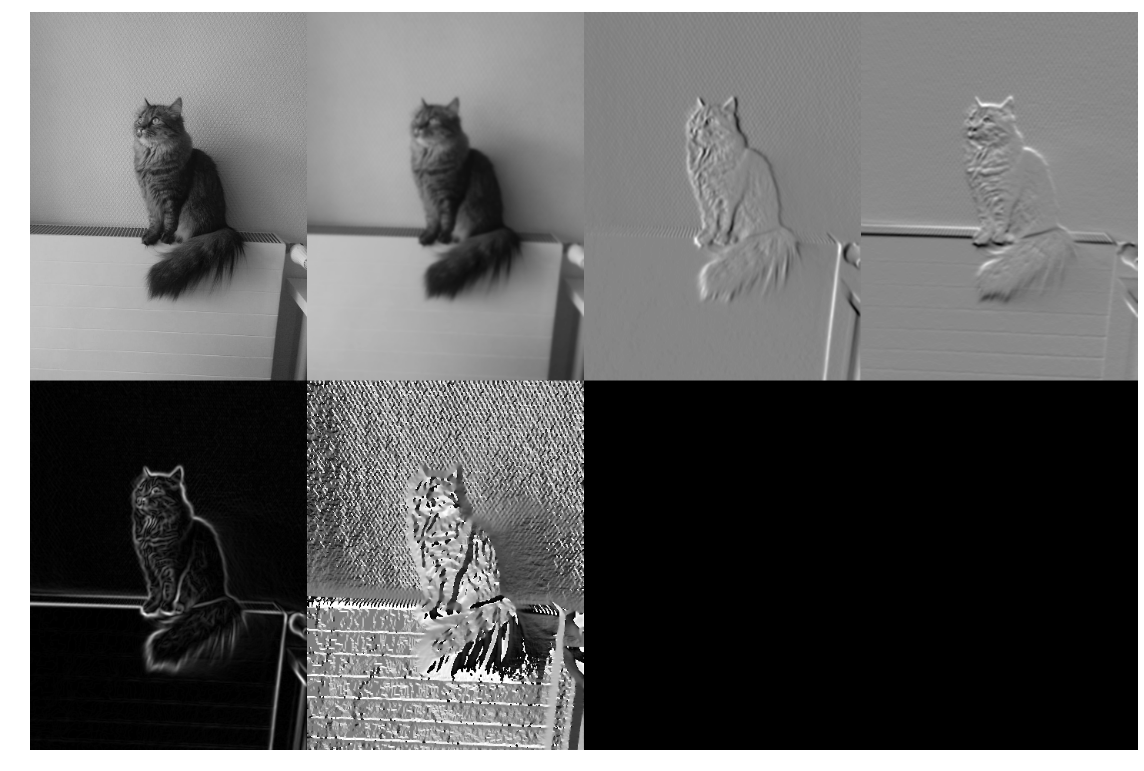

In [5]:
I = Smila.copy()

def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    dtype = value.dtype
    leftSpan = abs(float(leftMax - leftMin))
    rightSpan = rightMax - rightMin
    value -= leftMin
    value = value / leftSpan
    value *= rightSpan
    return value.astype(dtype)

def sobel(I):
    Kx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    Ky = Kx.T
    Sx = signal.convolve2d(I, Kx, boundary='symm', mode='same')
    Sy = signal.convolve2d(I, Ky, boundary='symm', mode='same')
    return Sx, Sy

def canny_edge(I, Debug=[]):
    Ig = ndimage.filters.gaussian_filter(I, 1.4)
    Ix, Iy = sobel(Ig)
    G = np.sqrt(Ix * Ix + Iy * Iy)
    Phi = np.arctan2(Ix, Iy)
    
    Debug.append(I)
    Debug.append(Ig)
    Debug.append(Ix)
    Debug.append(Iy)
    Debug.append(G)
    Debug.append(Phi)
    
    return G

Out = []
Ig = canny_edge(I, Debug=Out)
jv.plot_mats(Out, cols=4)


## Hough transform

* Feature extraction technique
* Find imperfect instances of objects within class of shapes by a voting procedure
